# Challenge: model comparison

Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they?

For this challenge, we will be using the [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices/downloads/avocado-prices.zip/1) dataset, containing historical data on avocado prices and sales volume in multiple US markets. 




In [4]:
# Importing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import scipy

In [5]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We need to do some feature processing, 

No missing values, nice!

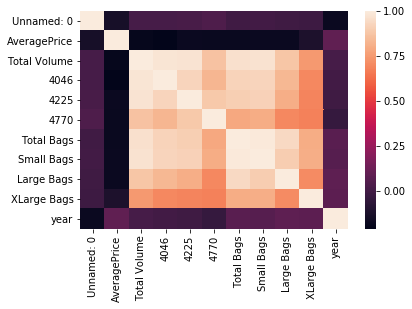

In [9]:
sns.heatmap(avocado.corr())
plt.show()


The features look extremely correlated with each other...is this a potential issue in modeling?

In [10]:
# label encoding categorical features:
categorical = avocado.dtypes[avocado.dtypes == 'object'].index
avocado['Date'] = pd.to_datetime(avocado.Date)
avocado['Month'] = avocado.Date.dt.month
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [11]:
del avocado['Unnamed: 0']

In [12]:
# One-hot encoding categorical variables:

avocado = pd.concat([avocado, pd.get_dummies(avocado.type, prefix='type')], axis=1)
avocado = pd.concat([avocado, pd.get_dummies(avocado.region, prefix='region',)], axis=1)


    

In [13]:

avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 70 columns):
Date                          18249 non-null datetime64[ns]
AveragePrice                  18249 non-null float64
Total Volume                  18249 non-null float64
4046                          18249 non-null float64
4225                          18249 non-null float64
4770                          18249 non-null float64
Total Bags                    18249 non-null float64
Small Bags                    18249 non-null float64
Large Bags                    18249 non-null float64
XLarge Bags                   18249 non-null float64
type                          18249 non-null object
year                          18249 non-null int64
region                        18249 non-null object
Month                         18249 non-null int64
type_conventional             18249 non-null uint8
type_organic                  18249 non-null uint8
region_Albany                 18249 non-null u

In [14]:
# Getting the top 20 most correlated features to our target, AveragePrice:
np.abs(avocado.corr().loc[:,'AveragePrice']).sort_values(ascending=False).head(20).index



Index(['AveragePrice', 'type_organic', 'type_conventional', '4046',
       'Total Volume', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       '4225', 'Month', 'region_HartfordSpringfield', 'region_SanFrancisco',
       'region_Houston', 'XLarge Bags', 'region_NewYork',
       'region_DallasFtWorth', 'region_SouthCentral', 'year',
       'region_Philadelphia'],
      dtype='object')

In [15]:

avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


## KNN Regression model

First, an unweighted approach to the KNN Regressor:

In [16]:

avocado.fillna(0, inplace=True)
#Feature set:
X = avocado[['type_organic', 'type_conventional', '4046',
       'Total Volume', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       '4225', 'Month', 'region_HartfordSpringfield', 'region_SanFrancisco',
       'region_Houston', 'XLarge Bags', 'region_NewYork',
       'region_DallasFtWorth', 'region_SouthCentral', 'year',
       'region_Philadelphia']]


#Target:
Y = avocado.AveragePrice




In [17]:
# # Creating a train/test data split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)


Checking the regression scores of an unweighted KNN Regressor. 
We are using a holdout-group method to evaluate the model's accuracy:

In [18]:
# Unweighted holdout group testing:
print("\n ************** Unweighted holdout group testing *********** \n")
from sklearn.neighbors import KNeighborsRegressor 
holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    holdout_scores.append(knn.score(X_test, y_test))
    print('For k = {}, the KNN Regression score is: {}'.format(k, holdout_scores[k-1]))
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Unweighted) The best k value = {}, with a score of {} \n".format(best_k, best_score))

# Weighted holdout group testing:
print("\n ************** Weighted holdout group testing *********** \n")
from sklearn.neighbors import KNeighborsRegressor 
holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    holdout_scores.append(knn.score(X_test, y_test))
    print('For k = {}, the KNN Regression score is: {}'.format(k, holdout_scores[k-1]))
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Weighted) The best k value = {}, with a score of {}".format(best_k, best_score))


 ************** Unweighted holdout group testing *********** 

For k = 1, the KNN Regression score is: 0.4906292935439832
For k = 2, the KNN Regression score is: 0.6107346748959095
For k = 3, the KNN Regression score is: 0.6437163339873894
For k = 4, the KNN Regression score is: 0.6595782424797427
For k = 5, the KNN Regression score is: 0.664578483269533
For k = 6, the KNN Regression score is: 0.6647143421091717
For k = 7, the KNN Regression score is: 0.6642941746401461
For k = 8, the KNN Regression score is: 0.6618339754786124
For k = 9, the KNN Regression score is: 0.661897066541212
For k = 10, the KNN Regression score is: 0.6582657403504066
For k = 11, the KNN Regression score is: 0.6563473597238744
For k = 12, the KNN Regression score is: 0.6541524413582954
For k = 13, the KNN Regression score is: 0.6515038381635558
For k = 14, the KNN Regression score is: 0.6487157632062293
For k = 15, the KNN Regression score is: 0.6463276248995953
For k = 16, the KNN Regression score is: 0.6448

Here, we are using a 10-fold cross validation to test our holdout group results against:

In [24]:
# Unweighted 10-fold cross validation testing:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(10, shuffle=True)
print("\n ************** Unweighted holdout group testing *********** \n")
cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    #knn.fit(X,Y)
    #train model with 5 fold cross-validation:
    score = cross_val_score(knn, X, Y, cv=kf)
    cv_scores.append(score.mean())
   
    print('For k = {}, the KNN Regression score is: {}'.format(k, score.mean()))
best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Unweighted) The best k value = {}, with a score of {} \n ".format(best_k, best_score))

#  Weighted 10-fold cross validation testing:
print("\n ************** Weighted holdout group testing *********** \n")

cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    #knn.fit(X,Y)
    #train model with 5 fold cross-validation:
    score = cross_val_score(knn, X, Y, cv=kf)
    cv_scores.append(score.mean())
   
    print('For k = {}, the KNN Regression score is: {}'.format(k, score.mean()))
best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Weighted) The best k value = {}, with a score of {} \n".format(best_k, best_score))


 ************** Unweighted holdout group testing *********** 

For k = 1, the KNN Regression score is: 0.5156852308737754
For k = 2, the KNN Regression score is: 0.6222067418204907
For k = 3, the KNN Regression score is: 0.649194308446661
For k = 4, the KNN Regression score is: 0.6585395349333777
For k = 5, the KNN Regression score is: 0.6630676855499151
For k = 6, the KNN Regression score is: 0.6648777480638913
For k = 7, the KNN Regression score is: 0.6651544496479854
For k = 8, the KNN Regression score is: 0.6658201990974189
For k = 9, the KNN Regression score is: 0.6654085623469044
For k = 10, the KNN Regression score is: 0.6630518190651543
For k = 11, the KNN Regression score is: 0.6619254801793324
For k = 12, the KNN Regression score is: 0.6602412240426838
For k = 13, the KNN Regression score is: 0.6611545409100923
For k = 14, the KNN Regression score is: 0.6581734198469871
For k = 15, the KNN Regression score is: 0.6555992283292589
For k = 16, the KNN Regression score is: 0.652

Preprocessing - Scaling the features

This is helpful to do, because k-nearest neighbors with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally. 

We can see if there is a large difference in the scaled model score  vs the unscaled:

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


X_scaled = scaler.fit_transform(X)

# Making a train-test split with the scaled features:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 465)



In [26]:
# Unweighted, scaled holdout group testing:
from sklearn.neighbors import KNeighborsRegressor 
holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s,y_train)
    y_pred= knn.predict(X_test_s)
    holdout_scores.append(knn.score(X_test_s, y_test))
    #print('For k = {}, the KNN Regression score is: {}'.format(k, holdout_scores[k-1]))
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Unweighted, scaled) The best k value = {}, with a score of {} \n".format(best_k, best_score))

# Weighted holdout group testing:
from sklearn.neighbors import KNeighborsRegressor 
holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train_s,y_train)
    y_pred= knn.predict(X_test_s)
    holdout_scores.append(knn.score(X_test_s, y_test))
    #print('For k = {}, the KNN Regression score is: {}'.format(k, holdout_scores[k-1]))
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Weighted, scaled) The best k value = {}, with a score of {}".format(best_k, best_score))


 (Unweighted, scaled) The best k value = 2, with a score of 0.8194780266934137 


 (Weighted, scaled) The best k value = 4, with a score of 0.8357045557401436


Looks like the scaled features improve the model accuracy!


In [27]:
# Unweighted 10-fold cross-validation testing: 
kf = KFold(10, shuffle=True)
cv_scores=[] 
for k in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=k)
    #knn.fit(X,Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, X_scaled, Y, cv=kf)
    cv_scores.append(score.mean())
                     
best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Unweighted, scaled) The best k value = {}, with a score of {} \n ".format(best_k, best_score))

#  Weighted 10-fold cross validation testing:
cv_scores=[] 
for k in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    #knn.fit(X,Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, X_scaled, Y, cv=kf)
    cv_scores.append(score.mean())
   

best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 #because list indexing starts at 0
print("\n (Weighted, scaled) The best k value = {}, with a score of {} \n".format(best_k, best_score))


 (Unweighted, scaled) The best k value = 2, with a score of 0.8395262991138536 
 

 (Weighted, scaled) The best k value = 3, with a score of 0.8542865416104222 



## Linear/OLS Regression

We found KNN Regression to yield pretty decent results, with scores of around 0.68 for unscaled features and as good as 0.85 when the features were scaled. 

To compare KNN Regression's performance, we will run our data through a Linear Regression. Checking linear regression with holdout group and cross-validation:

In [28]:
from sklearn import linear_model
# Instantiatie the linear model
lrm = linear_model.LinearRegression()

# Fitting the model to the training data:
lrm.fit(X_train, y_train)

# Checking the performace of the model:
print("Coefficients: \n", lrm.coef_)
print("Intercept: \n", lrm.intercept_)
print("R-squared: \n", lrm.score(X_test, y_test))


Coefficients: 
 [ 2.46134960e-01 -2.46134960e-01  5.84671406e-05 -5.85022017e-05
  5.83175191e-05 -2.24437864e-02  2.25022941e-02  2.25021297e-02
  5.85525003e-05  2.09314963e-02  4.15418700e-01  3.70430654e-01
 -3.55215048e-01  2.25036800e-02  3.13151597e-01 -3.13054605e-01
 -2.69624160e-01  5.56605085e-02  2.26635553e-01]
Intercept: 
 -110.94612996736741
R-squared: 
 0.5187453888778607


In [30]:
# Instantiate linear regression model
from sklearn import linear_model
kf = KFold(10, shuffle=True)
lrm = linear_model.LinearRegression()
# Fitting the model:
lrm.fit(X, Y)

# Checking the performace of the model:
print("Coefficients: \n", lrm.coef_)
print("Intercept: \n", lrm.intercept_)
print("R-squared: \n", lrm.score(X, Y))

lrm_score = cross_val_score(lrm, X, Y, cv=kf)
print('Cross validation: \n', lrm_score)
print('Cross validation mean score: ', lrm_score.mean())

Coefficients: 
 [ 2.45602584e-01 -2.45602584e-01  8.10462756e-05 -8.10806232e-05
  8.08829823e-05 -2.06248235e-02  2.07059153e-02  2.07057438e-02
  8.11297433e-05  2.08897006e-02  4.11791010e-01  3.95277327e-01
 -3.40968701e-01  2.07070987e-02  3.05452744e-01 -3.09138167e-01
 -2.58269595e-01  5.52671687e-02  2.25532374e-01]
Intercept: 
 -110.15453386110359
R-squared: 
 0.5194573575705939
Cross validation: 
 [0.52885147 0.52112017 0.50415955 0.54927625 0.48751871 0.5352495
 0.51737596 0.51455233 0.48691879 0.53776555]
Cross validation mean score:  0.5182788301372614


### Trying out Random Forest Regressor on the avocado dataset, just because

In [32]:
# Instantiate linear regression model
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
kf = KFold(10, shuffle=True)
# Fitting the model:
#rf.fit(X, Y)

# Checking the performace of the model:
# print("Coefficients: \n", rf.coef_)
# print("Intercept: \n", lrm.intercept_)
#print("R-squared: \n", rf.score(X, Y))

rf_score = cross_val_score(rf, X, Y, cv=kf)
print('Cross validation: \n', rf_score)
print('Cross validation mean score: ', rf_score.mean())

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Cross validation: 
 [0.85304573 0.89695428 0.89438603 0.87957248 0.87988193 0.87422262
 0.88433596 0.88025032 0.87910912 0.87872802]
Cross validation mean score:  0.8800486479161342


In [33]:
A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)

In [34]:
rf = RandomForestRegressor()

rf.fit(A_X_train, A_y_train)

A_y_pred = rf.predict(A_X_test)

rf.score(A_X_test, A_y_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8684794351455949

Looks like Random Forest actually predicts with better performance than either KNN Regression or Linear Regression


# Repeating the process with the House Prices Dataset 
[Kaggle House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)



In [35]:
from sqlalchemy import create_engine
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [36]:
# organizing the numerical and non-numerical data:
# Numerical features:
numerical = house_prices_df.dtypes[house_prices_df.dtypes != "object"].index
# Non-numerical, categorical features:
non_numerical = house_prices_df.dtypes[house_prices_df.dtypes == 'object'].index



In [37]:
# Converting all the non-numerical features to numerical features:
# doing this with one-hot encoding

for variable in non_numerical:
    house_prices_df = pd.concat([house_prices_df, pd.get_dummies(house_prices_df[variable], prefix=variable, drop_first=True)], axis=1)
    
# Deleting the original non-numerical feature columns:
for variable in non_numerical:
    house_prices_df.drop(variable, axis=1, inplace=True)
    



In [38]:
# Finding the top 10 most correlated features:

np.abs(house_prices_df.corr().loc[:,'saleprice']).sort_values(ascending=False).head(20).index


Index(['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', 'firstflrsf', 'exterqual_TA', 'fullbath', 'totrmsabvgrd',
       'yearbuilt', 'kitchenqual_TA', 'yearremodadd', 'foundation_PConc',
       'garageyrblt', 'masvnrarea', 'fireplaces', 'exterqual_Gd',
       'bsmtqual_TA', 'bsmtfintype1_GLQ'],
      dtype='object')

In [39]:
del house_prices_df['id']


## Linear/OLS Regression:


Linear regression, with cross-validation

In [41]:
from sklearn import linear_model
 
House_X = house_prices_df[[ 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', 'firstflrsf', 'exterqual_TA', 'fullbath', 'totrmsabvgrd',
       'yearbuilt', 'kitchenqual_TA', 'yearremodadd', 'foundation_PConc',
       'garageyrblt', 'masvnrarea', 'fireplaces', 'exterqual_Gd',
       'bsmtqual_TA', 'bsmtfintype1_GLQ']]
House_X.fillna(0, inplace=True)
House_Y = house_prices_df['saleprice']

# instantiating the model
lrm = linear_model.LinearRegression()
# fitting the model:
lrm.fit(House_X,House_Y)

# Checking the performace of the model:
print("Coefficients: \n", lrm.coef_)
print("Intercept: \n", lrm.intercept_)
print("R-squared: \n", lrm.score(House_X, House_Y))

from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True)
# Cross validation:
lrm_score = cross_val_score(lrm, House_X, House_Y, cv=kf)
print('Cross validation: \n', lrm_score)
print('Cross validation mean score: \n', lrm_score.mean())


Coefficients: 
 [ 1.53382906e+04  4.20362837e+01  1.23115461e+04  1.59301312e+01
  1.62615854e+01  8.50675312e+00 -3.82181156e+04 -4.52680355e+03
  7.49217695e+02  1.80610255e+02 -6.27915695e+03  2.51379452e+02
  8.12187097e+02 -6.57976707e+00  2.31488578e+01  1.08982070e+04
 -3.69735400e+04  8.90591563e+00  1.28921789e+04]
Intercept: 
 -847088.1098564983
R-squared: 
 0.7984057228748349
Cross validation: 
 [0.80722845 0.84224991 0.83476366 0.84880864 0.76697424 0.86689462
 0.11551451 0.85559063 0.83101781 0.77905451]
Cross validation mean score: 
 0.7548096981017245


Linear regression, with holdout group:

In [42]:
# creating train test split:
House_X_train, House_X_test, House_y_train, House_y_test = train_test_split(House_X, House_Y, test_size = 0.3, random_state = 465)


In [43]:
# Instantiating the model:
lrm = linear_model.LinearRegression()
# fitting the model:
lrm.fit(House_X_train, House_y_train)
# Creating predicitons:
lrm.predict(House_X_test)

# Checking the performace of the model:
print("Coefficients: \n", lrm.coef_)
print("Intercept: \n", lrm.intercept_)
print("R-squared: \n", lrm.score(House_X_test, House_y_test))



Coefficients: 
 [ 1.67182264e+04  3.92077675e+01  1.50064307e+04  6.46538941e+00
  1.18672129e+01  8.87004467e+00 -3.76401819e+04 -3.31915754e+03
  1.42305299e+03  1.79067589e+02 -5.91775716e+03  1.93696276e+02
 -6.19989111e+02 -6.82388120e+00  3.30286952e+01  9.69724025e+03
 -3.41899064e+04  2.26952688e+03  1.27005980e+04]
Intercept: 
 -737564.0691899552
R-squared: 
 0.7625249996197485


## KNN Regression:

Finding the ideal k value for an unweighted KNN Regression model:

#### Using holdout method to test our model:

In [44]:
from sklearn.neighbors import KNeighborsRegressor 
holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(House_X_train,House_y_train)
    y_pred= knn.predict(House_X_test)
    holdout_scores.append(knn.score(House_X_test, House_y_test))
#holdout_scores = pd.DataFrame(holdout_scores)
#holdout_scores
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 # because index starts at 0
print('(Unweighted) best k value is {}, with a KNN Regression score of {} \n'.format(best_k, best_score))

holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(House_X_train,House_y_train)
    y_pred= knn.predict(House_X_test)
    holdout_scores.append(knn.score(House_X_test, House_y_test))
#holdout_scores = pd.DataFrame(holdout_scores)
#holdout_scores
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 # because index starts at 0
print('(Weighted) best k value is {}, with a KNN Regression score of {}'.format(best_k, best_score))


(Unweighted) best k value is 7, with a KNN Regression score of 0.7060147721334012 

(Weighted) best k value is 7, with a KNN Regression score of 0.7046018520593789


#### Cross-validation method:

In [45]:
from sklearn.model_selection import cross_val_score
kf = KFold(10, shuffle=True)
# Unweighted Model:

cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(House_X,House_Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, House_X, House_Y, cv=kf)
    cv_scores.append(score.mean())

best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 # because index starts at 0
print('(Unweighted) best k value is {}, with a KNN Regression score of {} \n'.format(best_k, best_score))

cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(House_X,House_Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, House_X, House_Y, cv=kf)
    cv_scores.append(score.mean())

best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 # because index starts at 0
print('(Weighted) best k value is {}, with a KNN Regression score of {}'.format(best_k, best_score))


(Unweighted) best k value is 12, with a KNN Regression score of 0.7370283918123277 

(Weighted) best k value is 19, with a KNN Regression score of 0.7444921285601007


Further validation to check if our best k-value for the nearest neighbor model also has the lowest Root Mean Squared Error:

In [47]:
# Unweighted KNN model:
# testing different k values to see how much error there with each one:
import math
from sklearn.metrics import mean_squared_error
errors = []
for k in range(1,21):
   
    model = KNeighborsRegressor(n_neighbors = k)
    
    model.fit(House_X_train, House_y_train) # Fit them model 
    House_Y_pred = model.predict(House_X_test) # predicting the model on the test set
    
    error = (mean_squared_error(House_y_test, House_Y_pred))**0.5 # Calculate RMSE
    
    errors.append(error) #store rmse values
    #print('RMSE value for k= ' , k , 'is:', error)
best_rmse = min(errors)
best_k = errors.index(best_rmse) + 1
print('(Unweighted) Best k value is {}, with RMSE = {} \n'.format(best_k, best_rmse))

# Weighted KNN model:
# testing different k values to see how much error there with each one:
errors = []
for k in range(1,21):
   
    model = KNeighborsRegressor(n_neighbors = k, weights='distance')
    
    model.fit(House_X_train, House_y_train) # Fit them model 
    House_Y_pred = model.predict(House_X_test) # predicting the model on the test set
    
    error = (mean_squared_error(House_y_test, House_Y_pred))**0.5 # Calculate RMSE
    
    errors.append(error) #store rmse values
    #print('RMSE value for k= ' , k , 'is:', error)
best_rmse = min(errors)
best_k = errors.index(best_rmse) + 1
print('(Weighted) Best k value is {}, with RMSE = {}'.format(best_k, best_rmse))


(Unweighted) Best k value is 7, with RMSE = 44375.68044130725 

(Weighted) Best k value is 7, with RMSE = 44482.18942476738


#### Scaling the feature set to see if KNN yields better results this way:

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


House_X_scaled = scaler.fit_transform(House_X)
House_X_train_scaled = scaler.fit_transform(House_X_train)
House_X_test_scaled = scaler.fit_transform(House_X_test)

In [49]:
print('\n ********* Testing scaled feature set ***************** \n')


holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(House_X_train_scaled,House_y_train)
    House_y_pred= knn.predict(House_X_test_scaled)
    holdout_scores.append(knn.score(House_X_test_scaled, House_y_test))
#holdout_scores = pd.DataFrame(holdout_scores)
#holdout_scores
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 # because index starts at 0
print('(Unweighted) best k value is {}, with a KNN Regression score of {} \n'.format(best_k, best_score))

holdout_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(House_X_train_scaled,House_y_train)
    House_y_pred= knn.predict(House_X_test_scaled)
    holdout_scores.append(knn.score(House_X_test_scaled, House_y_test))
#holdout_scores = pd.DataFrame(holdout_scores)
#holdout_scores
best_score = max(holdout_scores)
best_k = holdout_scores.index(best_score) + 1 # because index starts at 0
print('(Weighted) best k value is {}, with a KNN Regression score of {}'.format(best_k, best_score))



 ********* Testing scaled feature set ***************** 

(Unweighted) best k value is 2, with a KNN Regression score of 0.7520308407614833 

(Weighted) best k value is 2, with a KNN Regression score of 0.7592653725069964


In [50]:
print('*************** Testing scaled feature set, cross-validation *********')
# Unweighted Model:
kf = KFold(10, shuffle=True)
cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(House_X_scaled,House_Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, House_X_scaled, House_Y, cv=kf)
    cv_scores.append(score.mean())

best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 # because index starts at 0
print('(Unweighted) best k value is {}, with a KNN Regression score of {} \n'.format(best_k, best_score))

cv_scores=[] 
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(House_X_scaled,House_Y)
    #train model with 10 fold cross-validation:
    score = cross_val_score(knn, House_X_scaled, House_Y, cv=kf)
    cv_scores.append(score.mean())

best_score = max(cv_scores)
best_k = cv_scores.index(best_score) + 1 # because index starts at 0
print('(Weighted) best k value is {}, with a KNN Regression score of {}'.format(best_k, best_score))


*************** Testing scaled feature set, cross-validation *********
(Unweighted) best k value is 15, with a KNN Regression score of 0.7502311664988209 

(Weighted) best k value is 6, with a KNN Regression score of 0.7644199130878763


Looks like scaling the features only slightly increased the model's performance 